In [6]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import tensorflow as tf
import cv2

2022-12-03 00:47:08.884735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-03 00:47:09.330681: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-03 00:47:09.394071: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-03 00:47:09.394104: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [7]:
# Create Image Object
class Image():
    def __init__(self, path):
        self.path = path
        self.set = path.split('/')[-3]
        self.plant = path.split('/')[-2]
        self.name = path.split('/')[-1]

    def remove_background(self):
        colored_image = cv2.imread(self.path)
        grey_image = cv2.cvtColor(colored_image, cv2.COLOR_RGB2GRAY)
        for _ in range(3):
            grey_image = cv2.GaussianBlur(grey_image, (51, 51), 0)
        _, thresh = cv2.threshold(grey_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Apply mask to colored_image
        colored_image = cv2.bitwise_or(colored_image, colored_image, mask=cv2.bitwise_not(thresh))
        colored_image = cv2.resize(colored_image, (3000, 4000))
        cv2.imshow(colored_image)
        self.image = colored_image

In [9]:
# Charger les données
images = []

for set in os.listdir('dataset/'):
    for plant in os.listdir('dataset/'+set+'/'):
        for image in os.listdir('dataset/'+set+'/'+plant+'/'):
            print('dataset/'+set+'/'+plant+'/'+image)
            img = Image('dataset/'+set+'/'+plant+'/'+image)
            img.remove_background()
            images.append(img.image.shape)
            del img       

dataset/Test/magnolia/magnolia074.jpg
dataset/Test/magnolia/magnolia072.jpg
dataset/Test/magnolia/magnolia079.jpg
dataset/Test/magnolia/magnolia075.jpg
dataset/Test/magnolia/magnolia078.jpg
dataset/Test/magnolia/magnolia071.jpg
dataset/Test/magnolia/magnolia080.jpg
dataset/Test/magnolia/magnolia076.jpg
dataset/Test/magnolia/magnolia073.jpg
dataset/Test/magnolia/magnolia077.jpg
dataset/Test/castanea/castarea080.jpg
dataset/Test/castanea/castarea079.jpg
dataset/Test/castanea/castarea071.jpg
dataset/Test/castanea/castarea074.jpg
dataset/Test/castanea/castarea076.jpg
dataset/Test/castanea/castarea072.jpg
dataset/Test/castanea/castarea075.jpg
dataset/Test/castanea/castarea078.jpg
dataset/Test/castanea/castarea077.jpg
dataset/Test/castanea/castarea073.jpg
dataset/Test/amborella/amborella080.jpg
dataset/Test/amborella/amborella079.jpg
dataset/Test/amborella/amborella071.jpg
dataset/Test/amborella/amborella075.jpg
dataset/Test/amborella/amborella077.jpg
dataset/Test/amborella/amborella078.jpg


In [ ]:
print('Nombre d\'images chargées :', len(images))


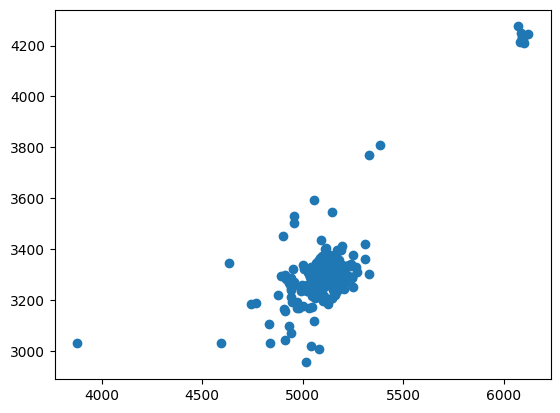

In [10]:
x = []
y = []
for image in images:
    x.append(image[0])
    y.append(image[1])

plt.scatter(x, y)
plt.show()